# Machine Learning and Statistic Project 2020
## Renewable Energy Sources - Prediction of Wind Turbine Power Production

* Student Name: **Maciej Burel**
* Student ID: G00376332
* Lecturer: Dr. Ian McLoughlin

***

<p align="center"> <img width="500" height="400" src="Images/w2.jpg" alt="root" /> </p>
(Image - Wharton, 2015)

##  Table of Contents<a id="table"/>
***

* [Goals and objectives](#goals)
* [Introduction](#introduction)
* [](#task2)
* [](#task3)
* [ ](#task4)
* [References](#references)

## Goals and objectives<a id="goals"/>
***

* The goal of this project is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set powerproduction.csv.
* The part of the project is to create a web service that will respond with predicted power values based on speed values sent as HTTP requests.
* Research and investigations about wind energy production 
* Solution and approaching for project task
* Implementation and presentation of the project results 
* Final project should contain following elements:
    * Jupyter notebook that trains a model using the data set. In the notebook, it should be explained the model and an analysis of its accuracy.
    * Python script that runs a web service based on the model, as above.
    * Dockerfile to build and run the web service in a container.

## Introduction<a id="introduction"/>
***

### Wind energy production

The need to move towards renewable and clean energy sources has increased considerably over the previous years.
As the demand for wind power has increased over the last decades, there is a serious need to set up wind farms and construct facilities depending on accurate wind forecasted data. Collected short-term wind forecasting has a significant effect on the electricity [1], which is also necessary to identify the size of wind farms.

It is obvious that there is a need for an accurate wind forecasting technique to substantially reduce the cost by wind power scheduling [2]. 

### How Do Wind Turbines Work?

Wind turbine blades rotate when hit by the wind. And this doesn’t have to be a strong wind, either: the blades of most turbines will start turning at a wind speed of 3-5 meters per second, which is a gentle breeze.  

It’s this spinning motion that turns a shaft in the nacelle – which is the box-like structure at the top of a wind turbine. A generator built into the nacelle then converts the kinetic energy of the turning shaft into electrical energy. This then passes through a transformer, which steps up the voltage so it can be transported on the National Grid or used by a local site.

<p align="center"> <img width="500" height="400" src="Images/w3.jpg" alt="root" /> </p>
(Image - Futuren, 2019)

Most onshore wind turbines have a capacity of 2-3 megawatts (MW), which can produce over 6 million kilowatt hours (kwh) of electricity every year. That’s enough to meet the electricity demand of around 1,500 average households.

Up to a certain level, the faster the wind blows, the more electricity is generated. In fact, when the wind speed doubles, up to eight times more electricity is generated. But if the wind is too strong, turbines will shut themselves down to prevent being damaged.

A wind turbine is typically 30-45% efficient – rising to 50% efficient at times of peak wind. If that sounds low to you, remember that if turbines were 100% efficient, the wind would completely drop after going through the turbine.[3]

### Wind Power Calculation

Wind energy is the kinetic energy of air in motion, also called wind. Total wind energy flowing through an imaginary surface with area A during the time t is:

$$E = \frac{1}{2}mv^2 = \frac{1}{2}(Avt\rho)v^2 = \frac{1}{2}At\rho v^3$$

where ρ is the density of air; v is the wind speed; Avt is the volume of air passing through A (which is considered perpendicular to the direction of the wind); Avtρ is therefore the mass m passing through "A". ½ ρv2 is the kinetic energy of the moving air per unit volume.

Power is energy per unit time, so the wind power incident on A (e.g. equal to the rotor area of a wind turbine) is [4] :

$$P = \frac{E}{t} = \frac{1}{2}A\rho v^3$$ 

A German physicist Albert Betz concluded in 1919 that no wind turbine can convert more than 16/27 (59.3%) of the kinetic energy of the wind into mechanical energy turning a rotor. To this day, this is known as the Betz Limit or **Betz'Law**. The theoretical maximum power efficiency of any design of wind turbine is 0.59 (i.e. no more than 59% of the energy carried by the wind can be extracted by a wind turbine). This is called the “power coefficient” and is defined as: 

$$P = C_{Pmax} = 0.59$$ 

Also, wind turbines cannot operate at this maximum limit. The power coefficient needs to be factored in the equation and the extractable power from the wind is given by[5] :

$$P_{avail} = \frac{1}{2}At\rho v^3 C_{p}$$

### The Power Curve

It is important to understand the relationship between power and wind speed to determine the required control type, optimization, or limitation. The power curve, a plot that can be used for this purpose, specifies how much power can be extracted from the incoming wind. The figure below contains an ideal wind turbine power curve.

<p align="center"> <img width="500" height="400" src="Images/powerc.jpg" alt="root" /> </p>
(Image - NI, 2020)

It can be seen that the power curve is split into three distinct regions. Because Region I consists of low wind speeds and is below the rated turbine power, the turbine is run at the maximum efficiency to extract all power. In other words, the turbine controls with optimization in mind. On the other hand, Region III consists of high wind speeds and is at the rated turbine power. The turbine then controls with limitation of the generated power in mind when operating in this region. Finally, Region II is a transition region mainly concerned with keeping rotor torque and noise low.[6]

## Data Review
***

To start with the practical part of the project, let's review data from powerproduction.csv file.
Firt the all required librarys that will be required for all the tasks in the project will be imported.

In [28]:
# Import all required librarys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Neural networks.
import tensorflow.keras as kr

# Save model to file
import joblib

# Use magic function to render the figure in a notebook
%matplotlib inline

In [29]:
# Load the dataset into the dataframe
df = pd.read_csv('Data/powerproduction.csv')
# Display first 10 rows of dataset
df.head(10)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [30]:
# Display last 10 rows of dataset
df.tail(10)

,speed,power
490,24.499,0.0
491,24.525,0.0
492,24.575,0.0
493,24.650,0.0
494,24.750,0.0
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


From the above outcome it looks like data set is consistent but as a good practice is worth to check if there are any empty  values before next steps.

In [31]:
# Total number of missing values.
df.isnull().values.sum()

0

There is no empty cels in the data set. 

Let's take a look at data statistical information. 

In [32]:
# Display statistical info of dataset
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The basic information about powerproduction data set revieled that we have two colums of data speed and power which contains 500 samples. There are no units for those data, however based on the information from the first paragraph we can assume that speed of the wind is in m/s. Power is most probably in MW for wind farm as one standard wind turbine can produce by avarge 2.5-3 MW. Speed can varry from 0 to 25 and the power from 0 to 133.56.
The next logical step is to visualize those data.

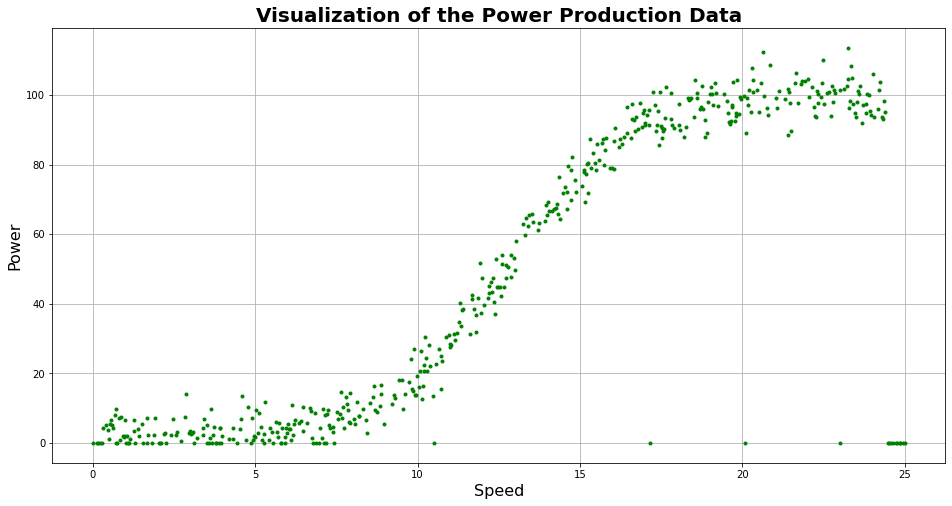

In [33]:
# Sets a plot style 
# Define chart size
plt.figure(figsize=(16,8))
# Add grid lines
plt.grid(True)
# Add title to the chart
plt.title("Visualization of the Power Production Data", fontweight="bold", fontsize=20)
# # Add x lable to the chart
plt.xlabel('Speed', size=16)
# Add y lable to the chart
plt.ylabel('Power', size=16)
# Plot and show data 
plt.plot(df.speed, df.power, '.g')
plt.show()

The graph shows that the power production by turbine increase significantly when wind speed is above 7 m/s up to 17 m/s where start to stabilize. There are a few instances where wind speed is high and the power outcome is 0. We can only guess that most probably wind turbine was in idle mode for maintenance.
As a next the data should go through the preprocessing step.

### Data Preprocessing

Data Preparation is one of the indispensable steps in any Machine Learning development life cycle.[7] Pre-processing refers to the transformations applied to our data before feeding it to the algorithm. Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis. For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner. Some specified Machine Learning model needs information in a specified format, for example, Random Forest algorithm does not support null values, therefore to execute random forest algorithm null values have to be managed from the original raw data set.
Another aspect is that data set should be formatted in such a way that more than one Machine Learning and Deep Learning algorithms are executed in one data set, and best out of them is chosen.[8] 

In our case as shown on the graph we have to remove outliers where wind turbine was not working and the power output was 0. 

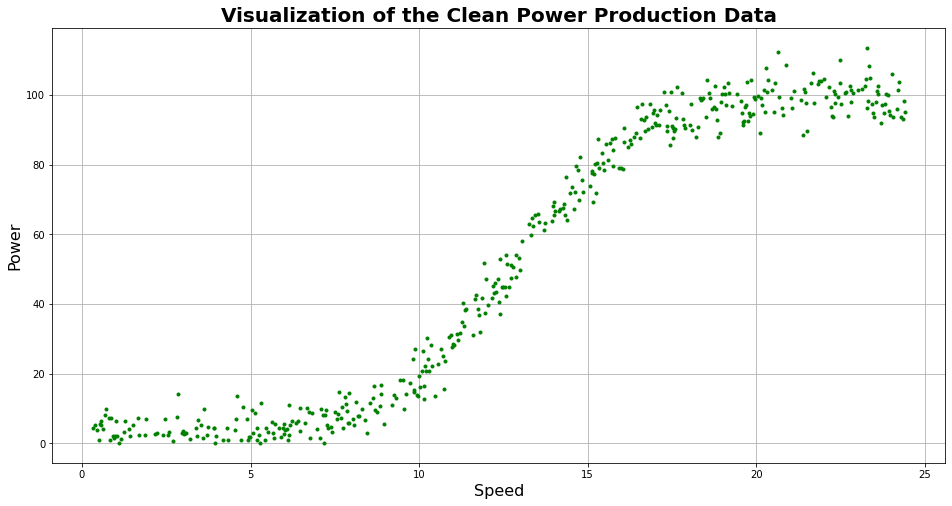

In [34]:
# Clean data from outliers and zero values
df_clean = df[df.power != 0]
# Display new clean dataset

# Define chart size
plt.figure(figsize=(16,8))
# Add grid lines
plt.grid(True)
# Add title to the chart
plt.title("Visualization of the Clean Power Production Data", fontweight="bold", fontsize=20)
# # Add x lable to the chart
plt.xlabel('Speed', size=16)
# Add y lable to the chart
plt.ylabel('Power', size=16)
# Plot and show data 
plt.plot(df_clean.speed, df_clean.power, '.g')
plt.show()

## Researching Models
***

There are many models available in machine learning that fit this purpose better or worse. By looking at the shape of the given data I will focus on regression models. In regression models, the output is continuous. 

Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x).

The basic goal of regression analysis is to model the expected value of a dependent variable y in terms of the value of an independent variable x. In simple regression, we used following equation:

$$y = a +bx + e$$

Here y is dependent variable, a is y intercept, b is the slope and e is the error rate.[9]

First let's divide dataset into two components that is speed and power.

In [35]:
# Divide dataset into two components
speed = df_clean.iloc[:, 0].values.reshape(-1,1)
power = df_clean.iloc[:, 1].values.reshape(-1,1)

We can now use function train_test_split from scikit-learn that will split our data into random train and test subsets.
Test size floating number represents the proportion of the dataset to include in the test split.

In [36]:
# Split data to train and test with test_size=0.3
speed_train, speed_test, power_train, power_test = train_test_split(speed, power, test_size=0.3, random_state=1)

#### Build the model

Now we can fit the Polynomial Regression model on our components.

In [37]:
# Fitting the Polynomial Regression model on two components speed and power.
# The “degree” argument controls the number of features created
# After few tries degree from 5 start produce satisfying results.
poly = PolynomialFeatures(degree = 10)
s_train_poly = poly.fit_transform(speed_train)
# Use linear regression as model on the power train values
m1 = LinearRegression()
m1.fit(s_train_poly, power_train)

# Create predicted model
pwr_train_predicted = m1.predict(s_train_poly)

#### Check model prediction

In [38]:
for i in range (4):
    index = np.random.choice(speed_train.shape[0], 1, replace=False)
    s = speed_train[index]
    p = power_train[index]
    print(f"For wind speed {s} actual power is: {p}")
    print(f"For wind speed {s} predicted power is: {m1.predict(poly.fit_transform(s))}\n")

For wind speed [[10.36]] actual power is: [[28.181]]
For wind speed [[10.36]] predicted power is: [[22.62187763]]

For wind speed [[12.262]] actual power is: [[46.136]]
For wind speed [[12.262]] predicted power is: [[44.57934953]]

For wind speed [[6.682]] actual power is: [[10.044]]
For wind speed [[6.682]] predicted power is: [[5.79936887]]

For wind speed [[7.407]] actual power is: [[3.122]]
For wind speed [[7.407]] predicted power is: [[6.63616654]]



#### Visualize data

We can now plot the prediction on both train and test data.

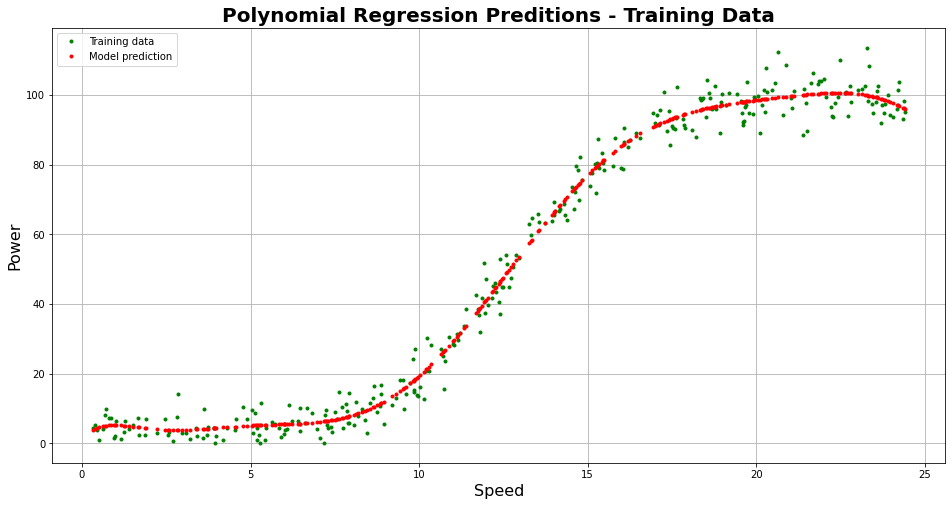

In [39]:
# Define chart size
plt.figure(figsize=(16,8))
# Add grid lines
plt.grid(True)
# Add title to the chart
plt.title("Polynomial Regression Preditions - Training Data", fontweight="bold", fontsize=20)
# # Add x lable to the chart
plt.xlabel('Speed', size=16)
# Add y lable to the chart
plt.ylabel('Power', size=16)
# Plot and show data 
plt.plot(speed_train, power_train, '.g', label='Training data')
plt.plot(speed_train, pwr_train_predicted, 'r.', label='Model prediction')
plt.legend(loc='best')
plt.show()

Prepare and plot the model on the test data.

In [40]:
s_test_poly = poly.fit_transform(speed_test)
# Use linear regression as model on the power train values
m2 = LinearRegression()
m2.fit(s_test_poly, power_test)

# Create predicted model
pwr_test_predicted = m2.predict(s_test_poly)

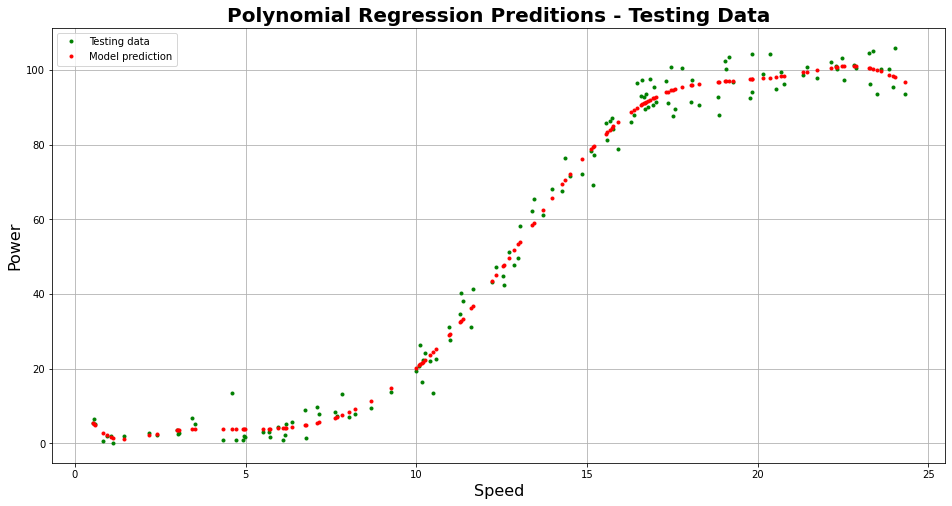

In [41]:
# Define chart size
plt.figure(figsize=(16,8))
# Add grid lines
plt.grid(True)
# Add title to the chart
plt.title("Polynomial Regression Preditions - Testing Data", fontweight="bold", fontsize=20)
# # Add x lable to the chart
plt.xlabel('Speed', size=16)
# Add y lable to the chart
plt.ylabel('Power', size=16)
# Plot and show data 
plt.plot(speed_test, power_test, '.g', label='Testing data')
plt.plot(speed_test, pwr_test_predicted, 'r.', label='Model prediction')
plt.legend(loc='best')
plt.show()

The above graphs show that the prediction model is performing quite well.

#### Error evaluation

To assess the accuracy of this regression model the calculation of RMSE and R-squared will be used.

In [42]:
# Calculate and display RMSE and R2
print("\nTesting Data")
print("RMSE: %.2f"% np.sqrt(mean_squared_error(power_test, pwr_test_predicted)))
print("R-squared: %.2f"% r2_score(power_test, pwr_test_predicted))


Testing Data
RMSE: 3.72
R-squared: 0.99


R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

R-squared is always between 0 and 100%:

* 0% indicates that the model explains none of the variability of the response data around its mean.
* 100% indicates that the model explains all the variability of the response data around its mean.

In general (simplifying), the higher the R-squared, the better the model fits the data.[11]

Root Mean Squared Error (RMSE) can range between 0 and infinity. Lower values are better.

From the above, we can say that our model performs quite well.

#### Saving model

In [25]:
#https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
# save the model to disk
filename = 'poly.sav'
joblib.dump(m1, filename)

['poly.sav']

In [26]:
# load the model from disk
m_loaded = joblib.load(filename)
# Test if model works
windspeed = 12
wsF, poF = 25, 120
ws = np.array([windspeed])
result = m_loaded.predict(poly.fit_transform([ws]))
print(result)

[[41.24920791]]


### Regression-based Neural Networks

A neural network is a computational system that creates predictions based on existing data.
A neural network consists of:

* Input layers: Layers that take inputs based on existing data
* Hidden layers: Layers that use backpropagation to optimise the weights of the input variables in order to improve the predictive power of the model
* Output layers: Output of predictions based on the data from the input and hidden layers

<p align="center"> <img width="500" height="400" src="Images/nn.jpg" alt="root" /> </p>
(Image - towardsdatascience, 2020)

One of the most important considerations when training a neural network is choosing the number of neurons to include in the input and hidden layers.[10] 

We will use Tensorflow module for this job which was already imported at the beginning in the libraries section. 

In [43]:
# Reuse reshaped data prepared for previous model
speed = df_clean.iloc[:, 0].values.reshape(-1,1)
power = df_clean.iloc[:, 1].values.reshape(-1,1)

# Split data to train and test with test_size=0.3
speed_train, speed_test, power_train, power_test = train_test_split(speed, power, test_size=0.3, random_state=1)

In [44]:
#https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-neurons.ipynb
# Create a new neural network.
m3 = kr.models.Sequential()

# Add multiple layers
m3.add(kr.layers.Dense(10, input_shape=(1,), activation="sigmoid", kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
m3.add(kr.layers.Dense(20, input_shape=(1,), activation="sigmoid", kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
m3.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
# Compile the model.
m3.compile(loss="mean_squared_error", optimizer="adam")


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [45]:
# fit the keras model on the dataset
m3.fit(speed_train, power_train, epochs=500, batch_size=10)

Train on 315 samples
Epoch 1/500
315/315 [==============================] - 0s 2ms/sample - loss: 4191.0016
Epoch 2/500
315/315 [==============================] - 0s 251us/sample - loss: 4129.1378
Epoch 3/500
315/315 [==============================] - 0s 244us/sample - loss: 4055.7183
Epoch 4/500
315/315 [==============================] - 0s 286us/sample - loss: 3970.4082
Epoch 5/500
315/315 [==============================] - 0s 270us/sample - loss: 3880.4383
Epoch 6/500
315/315 [==============================] - 0s 321us/sample - loss: 3801.8924
Epoch 7/500
315/315 [==============================] - 0s 251us/sample - loss: 3739.3552
Epoch 8/500
315/315 [==============================] - 0s 238us/sample - loss: 3685.1320
Epoch 9/500
315/315 [==============================] - 0s 235us/sample - loss: 3637.5032
Epoch 10/500
315/315 [==============================] - 0s 244us/sample - loss: 3593.1366
Epoch 11/500
315/315 [==============================] - 0s 238us/sample - loss: 3552.3498


Epoch 92/500
315/315 [==============================] - 0s 270us/sample - loss: 1160.5815
Epoch 93/500
315/315 [==============================] - 0s 213us/sample - loss: 1139.3566
Epoch 94/500
315/315 [==============================] - 0s 213us/sample - loss: 1118.4319
Epoch 95/500
315/315 [==============================] - 0s 210us/sample - loss: 1097.6266
Epoch 96/500
315/315 [==============================] - 0s 197us/sample - loss: 1078.1539
Epoch 97/500
315/315 [==============================] - 0s 168us/sample - loss: 1057.7608
Epoch 98/500
315/315 [==============================] - 0s 213us/sample - loss: 1038.3243
Epoch 99/500
315/315 [==============================] - 0s 222us/sample - loss: 1019.1035
Epoch 100/500
315/315 [==============================] - 0s 194us/sample - loss: 999.7639
Epoch 101/500
315/315 [==============================] - 0s 232us/sample - loss: 981.5669
Epoch 102/500
315/315 [==============================] - 0s 216us/sample - loss: 963.6352
Epoch 103/

315/315 [==============================] - 0s 219us/sample - loss: 156.1497
Epoch 184/500
315/315 [==============================] - 0s 235us/sample - loss: 151.1652
Epoch 185/500
315/315 [==============================] - 0s 235us/sample - loss: 147.4727
Epoch 186/500
315/315 [==============================] - 0s 213us/sample - loss: 143.2314
Epoch 187/500
315/315 [==============================] - 0s 232us/sample - loss: 140.2972
Epoch 188/500
315/315 [==============================] - 0s 229us/sample - loss: 135.9776
Epoch 189/500
315/315 [==============================] - 0s 216us/sample - loss: 132.3129
Epoch 190/500
315/315 [==============================] - 0s 225us/sample - loss: 128.4228
Epoch 191/500
315/315 [==============================] - 0s 241us/sample - loss: 124.9547
Epoch 192/500
315/315 [==============================] - 0s 244us/sample - loss: 121.8201
Epoch 193/500
315/315 [==============================] - 0s 197us/sample - loss: 118.3141
Epoch 194/500
315/315 [=

315/315 [==============================] - 0s 190us/sample - loss: 20.4526
Epoch 275/500
315/315 [==============================] - 0s 210us/sample - loss: 20.1185
Epoch 276/500
315/315 [==============================] - 0s 168us/sample - loss: 20.3690
Epoch 277/500
315/315 [==============================] - 0s 162us/sample - loss: 20.2417
Epoch 278/500
315/315 [==============================] - 0s 146us/sample - loss: 19.8249
Epoch 279/500
315/315 [==============================] - 0s 146us/sample - loss: 19.9567
Epoch 280/500
315/315 [==============================] - 0s 190us/sample - loss: 19.6616
Epoch 281/500
315/315 [==============================] - 0s 235us/sample - loss: 19.6146
Epoch 282/500
315/315 [==============================] - 0s 165us/sample - loss: 19.2405
Epoch 283/500
315/315 [==============================] - 0s 152us/sample - loss: 19.1578
Epoch 284/500
315/315 [==============================] - 0s 152us/sample - loss: 19.3110
Epoch 285/500
315/315 [============

315/315 [==============================] - 0s 194us/sample - loss: 17.4199
Epoch 367/500
315/315 [==============================] - 0s 213us/sample - loss: 17.4174
Epoch 368/500
315/315 [==============================] - 0s 197us/sample - loss: 17.4635
Epoch 369/500
315/315 [==============================] - 0s 197us/sample - loss: 17.6945
Epoch 370/500
315/315 [==============================] - 0s 162us/sample - loss: 17.4962
Epoch 371/500
315/315 [==============================] - 0s 156us/sample - loss: 17.4947
Epoch 372/500
315/315 [==============================] - 0s 149us/sample - loss: 17.4809
Epoch 373/500
315/315 [==============================] - 0s 146us/sample - loss: 17.6635
Epoch 374/500
315/315 [==============================] - 0s 152us/sample - loss: 17.5167
Epoch 375/500
315/315 [==============================] - 0s 171us/sample - loss: 17.2994
Epoch 376/500
315/315 [==============================] - 0s 162us/sample - loss: 17.7168
Epoch 377/500
315/315 [============

315/315 [==============================] - 0s 159us/sample - loss: 17.5050
Epoch 459/500
315/315 [==============================] - 0s 200us/sample - loss: 17.8393
Epoch 460/500
315/315 [==============================] - 0s 216us/sample - loss: 17.5283
Epoch 461/500
315/315 [==============================] - 0s 165us/sample - loss: 17.4269
Epoch 462/500
315/315 [==============================] - 0s 149us/sample - loss: 17.3687
Epoch 463/500
315/315 [==============================] - 0s 156us/sample - loss: 17.6000
Epoch 464/500
315/315 [==============================] - 0s 216us/sample - loss: 17.5748
Epoch 465/500
315/315 [==============================] - 0s 219us/sample - loss: 17.4606
Epoch 466/500
315/315 [==============================] - 0s 235us/sample - loss: 17.6169
Epoch 467/500
315/315 [==============================] - 0s 216us/sample - loss: 17.4571
Epoch 468/500
315/315 [==============================] - 0s 210us/sample - loss: 17.5161
Epoch 469/500
315/315 [============

#### Check model prediction

In [46]:
for i in range (4):
    index = np.random.choice(speed_train.shape[0], 1, replace=False)
    s = speed_train[index]
    p = power_train[index]
    print(f"For wind speed {s} actual power is: {p}")
    print(f"For wind speed {s} predicted power is: {m3.predict(s)}\n")

For wind speed [[6.982]] actual power is: [[4.187]]
For wind speed [[6.982]] predicted power is: [[6.836359]]

For wind speed [[9.885]] actual power is: [[27.136]]
For wind speed [[9.885]] predicted power is: [[17.98528]]

For wind speed [[11.737]] actual power is: [[38.552]]
For wind speed [[11.737]] predicted power is: [[37.892933]]

For wind speed [[7.733]] actual power is: [[4.443]]
For wind speed [[7.733]] predicted power is: [[8.299347]]



#### Visualize data

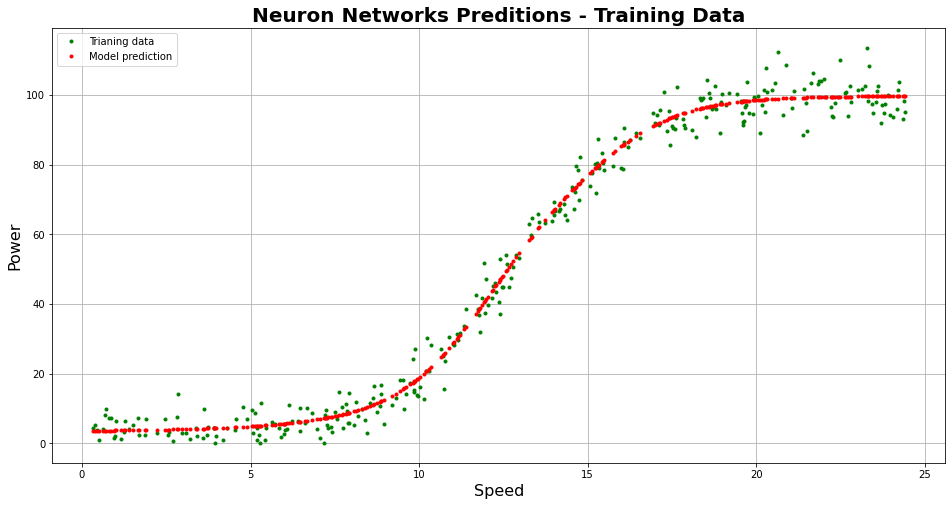

In [48]:
# Prediction on the training data visualization
# Define chart size
plt.figure(figsize=(16,8))
# Add grid lines
plt.grid(True)
# Add title to the chart
plt.title("Neuron Networks Preditions - Training Data", fontweight="bold", fontsize=20)
# # Add x lable to the chart
plt.xlabel('Speed', size=16)
# Add y lable to the chart
plt.ylabel('Power', size=16)
# Plot and show data 
plt.plot(speed_train, power_train, '.g', label='Trianing data')
plt.plot(speed_train, m3.predict(speed_train), 'r.', label='Model prediction')
plt.legend(loc='best')
plt.show()

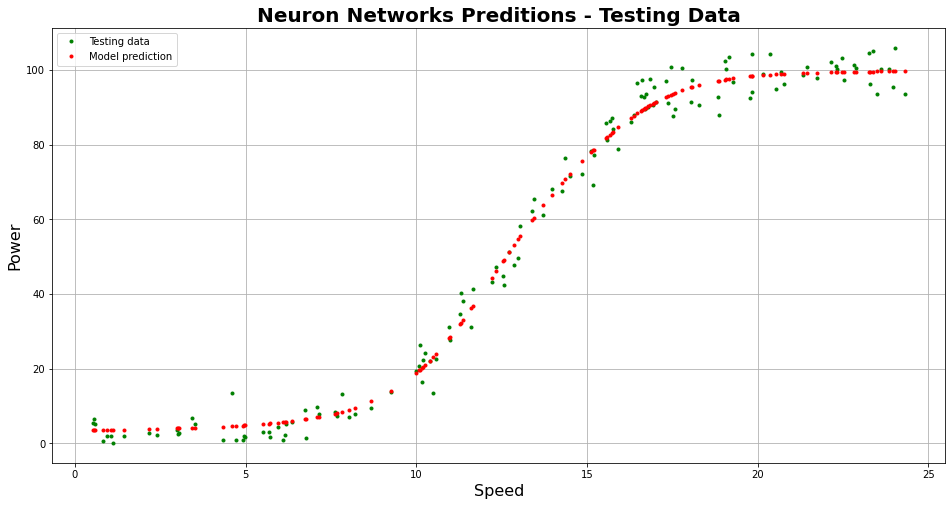

In [50]:
# Prediction on the test data visualization
# Define chart size
plt.figure(figsize=(16,8))
# Add grid lines
plt.grid(True)
# Add title to the chart
plt.title("Neuron Networks Preditions - Testing Data", fontweight="bold", fontsize=20)
# # Add x lable to the chart
plt.xlabel('Speed', size=16)
# Add y lable to the chart
plt.ylabel('Power', size=16)
# Plot and show data 
plt.plot(speed_test, power_test, '.g', label='Testing data')
plt.plot(speed_test, m3.predict(speed_test), 'r.', label='Model prediction')
plt.legend(loc='best')
plt.show()

#### Error evaluation

In [51]:
# Summary of the model
m3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Evaluate model
m3.evaluate(speed_test, power_test)

136/136 [==============================] - 0s 309us/sample - loss: 14.9810


14.981042413150563

In [53]:
# Calculate and display RMSE and R2
print("\nTesting Data")
print("RMSE: %.2f"% np.sqrt(mean_squared_error(power_test, m3.predict(speed_test))))
print("R-squared: %.2f"% r2_score(power_test, m3.predict(speed_test)))


Testing Data
RMSE: 3.87
R-squared: 0.99


## Summary and Conclusions<a id="summary"/>

## References<a id="references"/>

1. [R. J. Barthelmie, F. Murray, and S. C. Pryor, “The economic benefit of short-term forecasting for wind energy in the UK electricity market,” Energy Policy, vol. 36, no. 5, pp. 1687–1696, 2008.](https://www.hindawi.com/journals/cin/2020/8439719/#B3)[viewed 4th Dec 2020]
1. [Y.-K. Wu and H. Jing-Shan, A Literature Review of Wind Forecasting Technology in the World, IEEE Lausanne Powertech, Lausanne, Switzerland, 2007.](https://www.hindawi.com/journals/cin/2020/8439719/#B4)[viewed 4th Dec 2020]
1. [Good Energy - Wind Turbines](https://www.goodenergy.co.uk/how-do-wind-turbines-work/)[viewed 4th Dec 2020]
1. [Wikipedia - Wind Power - Floating Point Arithmetic: Issues and Limitations](https://en.wikipedia.org/wiki/Wind_power)[viewed 5th Dec 2020]
1. [Npower - Wind Turbine Power Calculations](https://www.raeng.org.uk/publications/other/23-wind-turbine)[viewed 5th Dec 2020]
1. [NI - Wind Turbine Control Methods](https://www.ni.com/en-ie/innovations/white-papers/08/wind-turbine-control-methods.html)[viewed 5th Dec 2020]
1. [Medium - Data Preparation](https://medium.com/@prtk13061992/data-preprocessing-steps-in-python-for-any-machine-learning-algorithm-2d52b57fa098)[viewed 27th Dec 2020]
1. [GeeksforGeeks - Data Preprocessing for Machine learning in Python](https://www.geeksforgeeks.org/data-preprocessing-machine-learning-python/)[viewed 27th Dec 2020]
1. [GeeksforGeeks - Python | Implementation of Polynomial Regression](https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/)[viewed 28th Dec 2020]
